







# Final plots and comparatives

Here I will make the final plots and comparatives

v2.0

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from astropy.table import Table
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde
from scipy import stats
import GPz
from astropy.table import Table
import ml_algorithims as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
import metrics

steps = 1 # pdf - monte carlo steps

# Data

In [3]:
## DR1
annz = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR1 results/ANNZ_randomReg_0000.csv")
ann = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR1 results/ann-rafael-results.csv")
gpz = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR1 results/gpz-rafael-results.csv")
annz_mags = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR1 results/vipersTest.csv")
## DR2
annz_dr2 = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR2 results/ANNZ_randomReg_0000.csv")
ann_dr2 = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR2 results/ann-rafael-results.csv")
gpz_dr2 = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR2 results/gpz-rafael-results.csv")
annz_mags_dr2 = pd.read_csv("/home/rafael/Projetos/master-thesis/data/DR2 results/vipersTest.csv")

In [4]:
x_plot = np.linspace(0.1,3.5,200) # maiores valores do redshiftt descrito no conjunto de dados
x_plot_dr2 = np.linspace(0.1,2.7467,200)

# ANNz


## DR1

In [5]:
pdf = np.empty((len(annz),200))

for i in range(200):
    teste = annz["F:ANNZ_PDF_0_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf[:,i] = teste[:,0]

In [6]:
pdf_final_annz = np.sum(pdf[:,:],axis = 0)

In [7]:
cdf = np.cumsum(pdf_final_annz)/len(annz)

In [8]:
mc_annz = []
pdf_mc_annz = [] 
z = np.empty(steps)
for i in range(len(annz)):
    for j in range(steps):
        z1, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf[i,:]),x_plot)
        z[j] = z1
        #pdf_mc_annz.append(rand)
    mc_annz.append(np.mean(z))


In [9]:
z_phot = annz["F:ANNZ_PDF_avg_0"].values

In [10]:
bins_annz = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (annz["F:ANNZ_PDF_avg_0"].values>(j-0.05)) & (annz["F:ANNZ_PDF_avg_0"].values<j)
    bins_annz.append(b)

In [11]:
bins_annz.insert(0,annz["F:ANNZ_PDF_avg_0"].values<(0.5))

In [12]:
print("Object in each bins: ")
for i in range(len(bins_annz)):
    print("bin"+str(i)+" :",z_phot[bins_annz[i]].shape[0])

Object in each bins: 
bin0 : 170
bin1 : 1721
bin2 : 1806
bin3 : 1892
bin4 : 1691
bin5 : 1624
bin6 : 1531
bin7 : 1473
bin8 : 1216
bin9 : 757
bin10 : 344
bin11 : 70
bin12 : 3
bin13 : 0
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [13]:
stack_annz = []
for i in range(len(bins_annz)):
    stack_annz.append(pdf[bins_annz[i],:])


In [14]:
zphot = annz["F:ANNZ_PDF_avg_0"].values
zspec = annz["D:z"].values

In [15]:
type(bins_annz[i])

numpy.ndarray

In [16]:
results = []
for i in range((13)):
    aux = metrics.compute_metrics(zspec[bins_annz[i]],zphot[bins_annz[i]],"ANNz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [17]:
annz_bins = pd.concat(results,ignore_index=False,axis = 1)

In [18]:
annz_bins_plot = []
for i in range(13):
    a = zphot[bins_annz[i]]
    annz_bins_plot.append(np.round(np.mean(a),2))
annz_bins_plot

[0.49, 0.53, 0.57, 0.62, 0.67, 0.72, 0.77, 0.82, 0.87, 0.92, 0.97, 1.02, 1.05]

In [19]:
 annz_bins

,ANNz-bins0,ANNz-bins1,ANNz-bins2,ANNz-bins3,ANNz-bins4,ANNz-bins5,ANNz-bins6,ANNz-bins7,ANNz-bins8,ANNz-bins9,ANNz-bins10,ANNz-bins11,ANNz-bins12
RMSE_znorm,0.093719,0.066849,0.070704,0.080901,0.086399,0.091755,0.092737,0.096040,0.106076,0.093696,0.136077,0.081982,0.055295
bias_znorm,0.025146,0.019955,0.011481,0.013887,0.011128,0.002022,0.000525,-0.000339,0.006556,-0.004678,-0.011780,-0.032851,-0.053802
std_znorm,0.090283,0.063801,0.069766,0.079701,0.085679,0.091732,0.092735,0.096039,0.105873,0.093579,0.135566,0.075112,0.012761
RMSE,0.154670,0.090543,0.104982,0.111065,0.136691,0.136592,0.146621,0.145066,0.150847,0.157264,0.222707,0.180287,0.120693
|znorm| > 0.15 (%),5.882353,3.079605,2.934662,3.541226,4.376109,5.049261,4.637492,4.344874,4.934211,6.076618,7.848837,7.142857,0.000000
|znorm| > 3std (%),2.941176,2.382336,1.993355,1.955603,1.714962,1.293103,1.436969,1.221996,1.398026,1.321004,2.034884,0.000000,66.666667
scatter,0.093719,0.066849,0.070704,0.080901,0.086399,0.091755,0.092737,0.096040,0.106076,0.093696,0.136077,0.081982,0.055295
bias,0.025146,0.019955,0.011481,0.013887,0.011128,0.002022,0.000525,-0.000339,0.006556,-0.004678,-0.011780,-0.032851,-0.053802
fr015,94.117647,96.920395,97.065338,96.458774,95.623891,94.950739,95.362508,95.655126,95.065789,93.923382,92.151163,92.857143,100.000000
sigma68,0.037549,0.047208,0.063978,0.074182,0.074958,0.099399,0.096285,0.093262,0.105706,0.114385,0.136115,0.133846,0.116789


### MC-CFD DR1

In [20]:
mc_annz = np.array(mc_annz)
print("Object in each bins: ")
for i in range(len(bins_annz)):
    print("bin"+str(i)+" :",mc_annz[bins_annz[i]].shape[0])

Object in each bins: 
bin0 : 170
bin1 : 1721
bin2 : 1806
bin3 : 1892
bin4 : 1691
bin5 : 1624
bin6 : 1531
bin7 : 1473
bin8 : 1216
bin9 : 757
bin10 : 344
bin11 : 70
bin12 : 3
bin13 : 0
bin14 : 0
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [21]:
results = []
for i in range((13)):
    aux = metrics.compute_metrics(zspec[bins_annz[i]],mc_annz[bins_annz[i]],"ANNz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux
mc_annz_bins = pd.concat(results,ignore_index=False,axis = 1)

In [22]:
mc_annz_bins

,ANNz-bins0,ANNz-bins1,ANNz-bins2,ANNz-bins3,ANNz-bins4,ANNz-bins5,ANNz-bins6,ANNz-bins7,ANNz-bins8,ANNz-bins9,ANNz-bins10,ANNz-bins11,ANNz-bins12
RMSE_znorm,0.145317,0.114517,0.113172,0.121829,0.121510,0.123593,0.126575,0.125521,0.133523,0.129858,0.152971,0.125891,0.088825
bias_znorm,0.069501,0.068936,0.055959,0.056511,0.050952,0.039877,0.032350,0.035461,0.038889,0.027797,0.018333,0.010506,0.015464
std_znorm,0.127619,0.091443,0.098369,0.107929,0.110311,0.116983,0.122371,0.120407,0.127734,0.126848,0.151868,0.125452,0.087468
RMSE,0.212330,0.160062,0.165494,0.176901,0.189140,0.187317,0.201634,0.192818,0.205290,0.222083,0.260898,0.268753,0.193385
|znorm| > 0.15 (%),14.705882,12.550843,13.012182,14.059197,13.187463,13.177340,12.998040,11.744739,13.486842,14.531044,17.441860,20.000000,0.000000
|znorm| > 3std (%),2.941176,3.137711,1.771872,2.431290,2.010645,1.354680,1.567603,1.289885,1.644737,1.188904,1.162791,2.857143,0.000000
scatter,0.145317,0.114517,0.113172,0.121829,0.121510,0.123593,0.126575,0.125521,0.133523,0.129858,0.152971,0.125891,0.088825
bias,0.069501,0.068936,0.055959,0.056511,0.050952,0.039877,0.032350,0.035461,0.038889,0.027797,0.018333,0.010506,0.015464
fr015,85.294118,87.449157,86.987818,85.940803,86.812537,86.822660,87.001960,88.255261,86.513158,85.468956,82.558140,80.000000,100.000000
sigma68,0.098183,0.096643,0.112776,0.123014,0.133903,0.147451,0.155857,0.152595,0.163936,0.185087,0.206647,0.249995,0.231592


## DR2

In [23]:
pdf_dr2 = np.empty((len(annz_dr2),200))

for i in range(200):
    teste = annz_dr2["F:ANNZ_PDF_0_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf_dr2[:,i] = teste[:,0]

In [24]:
pdf_final_annz_dr2 = np.sum(pdf_dr2[:,:],axis = 0)

In [25]:
cdf = np.cumsum(pdf_final_annz_dr2)/len(annz_dr2)

In [26]:
mc_annz_dr2 = []
pdf_mc_annz_dr2 = [] 
z = np.empty(steps)
for i in range(len(annz_dr2)):
    for j in range(steps):
        z1, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf_dr2[i,:]),x_plot_dr2)
        z[j] = z1
        #pdf_mc_annz.append(rand)
    mc_annz_dr2.append(np.mean(z))


In [27]:
z_phot = annz_dr2["F:ANNZ_PDF_avg_0"].values

In [28]:
bins_annz_dr2 = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (annz_dr2["F:ANNZ_PDF_avg_0"].values>(j-0.05)) & (annz_dr2["F:ANNZ_PDF_avg_0"].values<j)
    bins_annz_dr2.append(b)

In [29]:
bins_annz_dr2.insert(0,annz_dr2["F:ANNZ_PDF_avg_0"].values<(0.5))

In [30]:
print("Object in each bins: ")
for i in range(len(bins_annz)):
    print("bin"+str(i)+" :",z_phot[bins_annz_dr2[i]].shape[0])

Object in each bins: 
bin0 : 430
bin1 : 1937
bin2 : 1667
bin3 : 1828
bin4 : 1577
bin5 : 1436
bin6 : 1384
bin7 : 1357
bin8 : 1277
bin9 : 1008
bin10 : 524
bin11 : 226
bin12 : 115
bin13 : 32
bin14 : 7
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [31]:
stack_annz_dr2 = []
for i in range(len(bins_annz_dr2)):
    stack_annz_dr2.append(pdf_dr2[bins_annz_dr2[i],:])


In [32]:
zphot = annz_dr2["F:ANNZ_PDF_avg_0"].values
zspec = annz_dr2["D:z"].values

In [33]:
results = []
for i in range((15)):
    aux = metrics.compute_metrics(zspec[bins_annz_dr2[i]],zphot[bins_annz_dr2[i]],"ANNz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [34]:
annz_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [35]:
annz_bins_plot_dr2 = []
for i in range(15):
    a = zphot[bins_annz_dr2[i]]
    annz_bins_plot_dr2.append(np.round(np.mean(a),2))
annz_bins_plot_dr2

[0.49,
 0.53,
 0.58,
 0.63,
 0.67,
 0.73,
 0.77,
 0.82,
 0.87,
 0.92,
 0.97,
 1.02,
 1.07,
 1.11,
 1.16]

In [36]:
 annz_bins_dr2

,ANNz-bins0,ANNz-bins1,ANNz-bins2,ANNz-bins3,ANNz-bins4,ANNz-bins5,ANNz-bins6,ANNz-bins7,ANNz-bins8,ANNz-bins9,ANNz-bins10,ANNz-bins11,ANNz-bins12,ANNz-bins13,ANNz-bins14
RMSE_znorm,0.074445,0.071993,0.068629,0.067909,0.063817,0.074470,0.076894,0.083168,0.086637,0.102172,0.118014,0.084590,0.096238,0.225812,0.037767
bias_znorm,0.022316,0.014394,0.009633,0.006691,0.005622,0.008726,0.005548,0.005217,0.003633,0.002076,0.003793,-0.003934,-0.004029,0.028044,-0.014738
std_znorm,0.071021,0.070539,0.067949,0.067578,0.063568,0.073957,0.076694,0.083004,0.086561,0.102151,0.117953,0.084498,0.096154,0.224064,0.034773
RMSE,0.094562,0.097702,0.100340,0.097856,0.092469,0.104222,0.106759,0.115169,0.124087,0.140392,0.168271,0.162027,0.174177,0.270374,0.082095
|znorm| > 0.15 (%),5.348837,3.407331,3.239352,2.625821,2.346227,2.576602,2.312139,2.063375,2.819107,3.174603,4.961832,6.194690,6.956522,6.250000,0.000000
|znorm| > 3std (%),3.023256,2.219928,2.519496,1.805252,1.775523,1.392758,1.083815,1.031688,1.252937,1.587302,1.335878,1.327434,1.739130,3.125000,0.000000
scatter,0.074445,0.071993,0.068629,0.067909,0.063817,0.074470,0.076894,0.083168,0.086637,0.102172,0.118014,0.084590,0.096238,0.225812,0.037767
bias,0.022316,0.014394,0.009633,0.006691,0.005622,0.008726,0.005548,0.005217,0.003633,0.002076,0.003793,-0.003934,-0.004029,0.028044,-0.014738
fr015,94.651163,96.592669,96.760648,97.374179,97.653773,97.423398,97.687861,97.936625,97.180893,96.825397,95.038168,93.805310,93.043478,93.750000,100.000000
sigma68,0.046664,0.051235,0.060416,0.049537,0.058255,0.063999,0.064766,0.072986,0.079819,0.085670,0.105035,0.150223,0.158122,0.158874,0.050509


### MC-CFD DR2

In [37]:
mc_annz_dr2 = np.array(mc_annz_dr2)
print("Object in each bins: ")
for i in range(len(bins_annz_dr2)):
    print("bin"+str(i)+" :",mc_annz_dr2[bins_annz_dr2[i]].shape[0])

Object in each bins: 
bin0 : 430
bin1 : 1937
bin2 : 1667
bin3 : 1828
bin4 : 1577
bin5 : 1436
bin6 : 1384
bin7 : 1357
bin8 : 1277
bin9 : 1008
bin10 : 524
bin11 : 226
bin12 : 115
bin13 : 32
bin14 : 7
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [38]:
results = []
for i in range((15)):
    aux = metrics.compute_metrics(zspec[bins_annz_dr2[i]],mc_annz_dr2[bins_annz_dr2[i]],"ANNz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [39]:
mc_annz_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [40]:
 mc_annz_bins_dr2

,ANNz-bins0,ANNz-bins1,ANNz-bins2,ANNz-bins3,ANNz-bins4,ANNz-bins5,ANNz-bins6,ANNz-bins7,ANNz-bins8,ANNz-bins9,ANNz-bins10,ANNz-bins11,ANNz-bins12,ANNz-bins13,ANNz-bins14
RMSE_znorm,0.118324,0.107092,0.099597,0.096887,0.096164,0.105940,0.103575,0.110065,0.102056,0.124757,0.137895,0.115867,0.114121,0.315041,0.198281
bias_znorm,0.073420,0.062562,0.049663,0.047603,0.044036,0.045522,0.041696,0.036710,0.032149,0.028546,0.028153,0.028300,0.018514,0.079606,-0.074071
std_znorm,0.092791,0.086917,0.086332,0.084386,0.085489,0.095661,0.094812,0.103763,0.096860,0.121448,0.134991,0.112358,0.112609,0.304818,0.183926
RMSE,0.154664,0.147839,0.145184,0.144256,0.145591,0.157366,0.154257,0.166295,0.161801,0.192494,0.210822,0.220072,0.207557,0.396476,0.446045
|znorm| > 0.15 (%),12.325581,9.447599,8.158368,7.111597,6.721623,7.451253,6.647399,7.590273,6.029757,7.837302,10.877863,17.699115,13.043478,12.500000,14.285714
|znorm| > 3std (%),2.325581,2.219928,2.399520,2.188184,1.902346,1.532033,1.156069,1.179071,1.801096,1.587302,1.717557,1.327434,0.869565,3.125000,0.000000
scatter,0.118324,0.107092,0.099597,0.096887,0.096164,0.105940,0.103575,0.110065,0.102056,0.124757,0.137895,0.115867,0.114121,0.315041,0.198281
bias,0.073420,0.062562,0.049663,0.047603,0.044036,0.045522,0.041696,0.036710,0.032149,0.028546,0.028153,0.028300,0.018514,0.079606,-0.074071
fr015,87.674419,90.552401,91.841632,92.888403,93.278377,92.548747,93.352601,92.409727,93.970243,92.162698,89.122137,82.300885,86.956522,87.500000,85.714286
sigma68,0.102413,0.088626,0.093041,0.088709,0.095791,0.104153,0.108392,0.123239,0.123950,0.137079,0.166489,0.210799,0.198336,0.195531,0.122843


# Ann

## DR1

In [41]:
pdf1 = np.empty((len(ann),200))
x_plot = np.linspace(0,3.5,200)
for i in range(200):
    teste = ann["ann_pdf_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf1[:,i] = teste[:,0]

In [42]:
pdf_final_ann = np.sum(pdf1[:,:],axis = 0)

In [43]:
cdf = np.cumsum(pdf_final_ann)/len(ann)

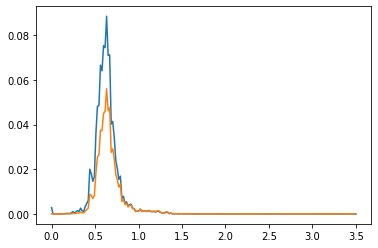

In [62]:
plt.plot(x_plot,pdf1[2,:]);
plt.plot(x_plot,pdf1[2,:]*x_plot)

In [63]:
from scipy import integrate
avg_pdf = []
for i in range(len(pdf1)):
    avg_pdf.append(integrate.simps(x_plot*(pdf1[i,:])))

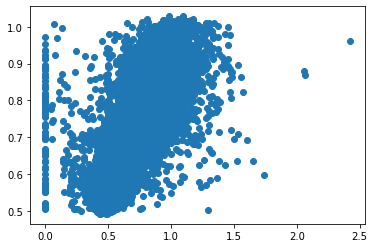

In [68]:
plt.scatter(z_spec,avg_pdf)

In [69]:
avg_pdf[3],z_spec[3],z_phot[3]

(0.7825527123697571, 0.8386, 0.7563536)

In [47]:
mc_ann = []
pdf_mc_ann = []
z = np.empty(steps)
for i in range(len(ann)):
    for j in range(steps):
        zfinal, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf1[i,:]),x_plot)
        z[j] = zfinal
    mc_ann.append(np.mean(z))


In [45]:
z_phot = ann["ann:z"].values
z_spec = ann["z"].values

In [49]:
bins_ann = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (z_phot>(j-0.05)) & (z_phot<j)
    bins_ann.append(b)

In [50]:
bins_ann.insert(0,z_phot<(0.5))

In [51]:
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",z_phot[bins_ann[i]].shape[0])

Object in each bins: 
bin0 : 859
bin1 : 1619
bin2 : 1535
bin3 : 1145
bin4 : 1761
bin5 : 2186
bin6 : 1590
bin7 : 1109
bin8 : 1377
bin9 : 480
bin10 : 290
bin11 : 203
bin12 : 124
bin13 : 19
bin14 : 1
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [52]:
stack_ann = []
for i in range(len(bins_ann)):
    stack_ann.append(pdf1[bins_ann[i],:])


In [53]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(z_spec[bins_ann[i]],z_phot[bins_ann[i]],"ANN-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [54]:
ann_bins = pd.concat(results,ignore_index=False,axis = 1)

In [55]:
ann_bins

,ANN-bins0,ANN-bins1,ANN-bins2,ANN-bins3,ANN-bins4,ANN-bins5,ANN-bins6,ANN-bins7,ANN-bins8,ANN-bins9,ANN-bins10,ANN-bins11
RMSE_znorm,0.090500,0.085598,0.070719,0.085716,0.084832,0.080627,0.103781,0.103074,0.083496,0.081454,0.111258,0.127872
bias_znorm,-0.022426,-0.002952,-0.002078,0.010585,0.005842,0.000904,0.002990,-0.003544,0.002608,-0.000238,0.015500,0.035809
std_znorm,0.087677,0.085547,0.070689,0.085060,0.084631,0.080622,0.103738,0.103014,0.083456,0.081453,0.110173,0.122756
RMSE,0.171064,0.126428,0.113516,0.128693,0.139893,0.133550,0.149573,0.159399,0.133602,0.153057,0.159409,0.176104
|znorm| > 0.15 (%),7.334109,5.250154,3.127036,4.192140,5.905735,4.803294,5.031447,5.770965,3.631082,3.750000,5.862069,5.418719
|znorm| > 3std (%),3.725262,2.408894,2.084691,2.358079,1.533220,1.235133,1.320755,1.262399,1.016703,0.833333,1.034483,0.985222
scatter,0.090500,0.085598,0.070719,0.085716,0.084832,0.080627,0.103781,0.103074,0.083496,0.081454,0.111258,0.127872
bias,-0.022426,-0.002952,-0.002078,0.010585,0.005842,0.000904,0.002990,-0.003544,0.002608,-0.000238,0.015500,0.035809
fr015,92.665891,94.749846,96.872964,95.807860,94.094265,95.196706,94.968553,94.229035,96.368918,96.250000,94.137931,94.581281
sigma68,0.071402,0.073445,0.075156,0.083076,0.100100,0.102209,0.109273,0.107331,0.103457,0.112999,0.112633,0.134402


In [56]:
ann_bins_plot = []
for i in range(12):
    a = z_phot[bins_ann[i]]
    ann_bins_plot.append(np.round(np.mean(a),2))
ann_bins_plot

[0.47, 0.53, 0.57, 0.63, 0.68, 0.72, 0.77, 0.83, 0.87, 0.92, 0.97, 1.02]

## MC-CFD ANN DR1

In [57]:
mc_ann = np.array(mc_ann)
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",mc_ann[bins_ann[i]].shape[0])

Object in each bins: 
bin0 : 859
bin1 : 1619
bin2 : 1535
bin3 : 1145
bin4 : 1761
bin5 : 2186
bin6 : 1590
bin7 : 1109
bin8 : 1377
bin9 : 480
bin10 : 290
bin11 : 203
bin12 : 124
bin13 : 19
bin14 : 1
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [58]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(z_spec[bins_ann[i]],mc_ann[bins_ann[i]],"ANN-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [59]:
mc_ann_bins = pd.concat(results,ignore_index=False,axis = 1)

In [57]:
mc_ann_bins

,ANN-bins0,ANN-bins1,ANN-bins2,ANN-bins3,ANN-bins4,ANN-bins5,ANN-bins6,ANN-bins7,ANN-bins8,ANN-bins9,ANN-bins10,ANN-bins11
RMSE_znorm,0.100284,0.088745,0.069215,0.085888,0.081618,0.077584,0.101362,0.101388,0.081810,0.078062,0.106700,0.104293
bias_znorm,0.024111,0.017336,0.012531,0.016688,0.010901,0.004966,0.007414,0.000322,-0.000682,-0.009056,-0.005868,0.000032
std_znorm,0.097343,0.087036,0.068071,0.084251,0.080887,0.077425,0.101091,0.101387,0.081808,0.077535,0.106539,0.104293
RMSE,0.148625,0.118644,0.104127,0.121567,0.129252,0.125541,0.141408,0.152425,0.129590,0.147955,0.157908,0.155567
|znorm| > 0.15 (%),7.450524,4.632489,2.866450,4.628821,5.337876,4.071363,4.276730,5.049594,3.050109,3.333333,4.827586,4.433498
|znorm| > 3std (%),2.328289,2.347128,1.758958,1.746725,1.419648,1.326624,1.320755,1.262399,1.016703,0.833333,1.034483,0.985222
scatter,0.100284,0.088745,0.069215,0.085888,0.081618,0.077584,0.101362,0.101388,0.081810,0.078062,0.106700,0.104293
bias,0.024111,0.017336,0.012531,0.016688,0.010901,0.004966,0.007414,0.000322,-0.000682,-0.009056,-0.005868,0.000032
fr015,92.549476,95.367511,97.133550,95.371179,94.662124,95.928637,95.723270,94.950406,96.949891,96.666667,95.172414,95.566502
sigma68,0.065523,0.067434,0.065421,0.070390,0.091181,0.091381,0.094639,0.103437,0.096468,0.106864,0.112451,0.121109


## DR2

In [58]:
pdf1_dr2 = np.empty((len(ann_dr2),200))
for i in range(200):
    teste = ann_dr2["ann_pdf_"+str(i)].values
    teste = teste.reshape(-1,1)
    pdf1_dr2[:,i] = teste[:,0]

In [59]:
pdf_final_ann_dr2 = np.sum(pdf1_dr2[:,:],axis = 0)

In [60]:
cdf = np.cumsum(pdf_final_ann_dr2)/len(ann_dr2)

In [61]:
mc_ann_dr2 = []
pdf_mc_ann_dr2 = []
z = np.empty(steps)
for i in range(len(ann_dr2)):
    for j in range(steps):
        zfinal, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf1_dr2[i,:]),x_plot_dr2)
        z[j] = zfinal
    mc_ann_dr2.append(np.mean(z))


In [62]:
z_phot = ann_dr2["ann:z"].values
z_spec = ann_dr2["z"].values

In [63]:
bins_ann_dr2 = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (z_phot>(j-0.05)) & (z_phot<j)
    bins_ann_dr2.append(b)

In [64]:
bins_ann_dr2.insert(0,z_phot<(0.5))

In [65]:
print("Object in each bins: ")
for i in range(len(bins_ann_dr2)):
    print("bin"+str(i)+" :",z_phot[bins_ann_dr2[i]].shape[0])

Object in each bins: 
bin0 : 1269
bin1 : 1509
bin2 : 1173
bin3 : 2169
bin4 : 1745
bin5 : 1142
bin6 : 1455
bin7 : 1745
bin8 : 1147
bin9 : 829
bin10 : 356
bin11 : 167
bin12 : 55
bin13 : 30
bin14 : 11
bin15 : 2
bin16 : 1
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [66]:
stack_ann_dr2 = []
for i in range(len(bins_ann_dr2)):
    stack_ann_dr2.append(pdf1_dr2[bins_ann_dr2[i],:])


In [67]:
results = []
for i in range((13)):
    aux = metrics.compute_metrics(z_spec[bins_ann_dr2[i]],z_phot[bins_ann_dr2[i]],"ANN-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [68]:
ann_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [69]:
ann_bins_dr2

,ANN-bins0,ANN-bins1,ANN-bins2,ANN-bins3,ANN-bins4,ANN-bins5,ANN-bins6,ANN-bins7,ANN-bins8,ANN-bins9,ANN-bins10,ANN-bins11,ANN-bins12
RMSE_znorm,0.065589,0.078466,0.064968,0.065363,0.069397,0.048746,0.098821,0.077879,0.096365,0.104277,0.091449,0.123645,0.225224
bias_znorm,-0.007664,0.002708,0.008430,0.001860,-0.002889,-0.007816,0.005882,-0.007200,-0.010502,-0.016955,0.004455,0.030898,0.067802
std_znorm,0.065139,0.078419,0.064419,0.065337,0.069337,0.048115,0.098646,0.077545,0.095791,0.102889,0.091340,0.119722,0.214776
RMSE,0.102049,0.120413,0.090191,0.100790,0.096170,0.090469,0.127829,0.128707,0.153452,0.173328,0.146911,0.173258,0.270390
|znorm| > 0.15 (%),3.152088,4.638834,2.557545,2.166897,1.833811,1.225919,3.092784,2.922636,5.318221,5.790109,4.494382,7.185629,14.545455
|znorm| > 3std (%),2.442868,2.319417,1.960784,1.798064,1.260745,1.401051,1.512027,1.088825,1.133391,1.085645,1.404494,1.197605,3.636364
scatter,0.065589,0.078466,0.064968,0.065363,0.069397,0.048746,0.098821,0.077879,0.096365,0.104277,0.091449,0.123645,0.225224
bias,-0.007664,0.002708,0.008430,0.001860,-0.002889,-0.007816,0.005882,-0.007200,-0.010502,-0.016955,0.004455,0.030898,0.067802
fr015,96.847912,95.361166,97.442455,97.833103,98.166189,98.774081,96.907216,97.077364,94.681779,94.209891,95.505618,92.814371,85.454545
sigma68,0.052656,0.069881,0.058744,0.054499,0.059631,0.063475,0.077910,0.089417,0.107776,0.127994,0.102897,0.107865,0.184020


In [70]:
ann_bins_plot_dr2 = []
for i in range(13):
    a = z_phot[bins_ann_dr2[i]]
    ann_bins_plot_dr2.append(np.round(np.mean(a),2))
ann_bins_plot_dr2

[0.48, 0.52, 0.58, 0.62, 0.67, 0.73, 0.77, 0.83, 0.87, 0.92, 0.97, 1.02, 1.07]

### MC-CFD ANN DR2

In [71]:
mc_ann_dr2 = np.array(mc_ann_dr2)
print("Object in each bins: ")
for i in range(len(bins_ann_dr2)):
    print("bin"+str(i)+" :",mc_ann_dr2[bins_ann_dr2[i]].shape[0])

Object in each bins: 
bin0 : 1269
bin1 : 1509
bin2 : 1173
bin3 : 2169
bin4 : 1745
bin5 : 1142
bin6 : 1455
bin7 : 1745
bin8 : 1147
bin9 : 829
bin10 : 356
bin11 : 167
bin12 : 55
bin13 : 30
bin14 : 11
bin15 : 2
bin16 : 1
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [72]:
results = []
for i in range((13)):
    aux = metrics.compute_metrics(z_spec[bins_ann_dr2[i]],mc_ann_dr2[bins_ann_dr2[i]],"ANN-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [73]:
mc_ann_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [74]:
mc_ann_bins_dr2

,ANN-bins0,ANN-bins1,ANN-bins2,ANN-bins3,ANN-bins4,ANN-bins5,ANN-bins6,ANN-bins7,ANN-bins8,ANN-bins9,ANN-bins10,ANN-bins11,ANN-bins12
RMSE_znorm,0.088896,0.099018,0.081460,0.081709,0.083473,0.056936,0.108765,0.085744,0.102764,0.105647,0.093420,0.120256,0.218520
bias_znorm,0.058889,0.054508,0.046373,0.043763,0.042180,0.029733,0.041881,0.033873,0.030213,0.020588,0.024828,0.031998,0.053311
std_znorm,0.066593,0.082664,0.066972,0.069001,0.072031,0.048556,0.100378,0.078770,0.098222,0.103622,0.090060,0.115921,0.211918
RMSE,0.125580,0.139829,0.112324,0.118667,0.113907,0.099707,0.138344,0.133712,0.150678,0.161608,0.143153,0.168282,0.259063
|znorm| > 0.15 (%),4.649330,6.428098,3.239557,3.503919,2.464183,1.751313,3.161512,3.094556,4.359198,5.186972,4.213483,6.586826,9.090909
|znorm| > 3std (%),2.442868,2.717031,2.216539,1.751959,1.203438,1.751313,1.649485,1.146132,1.307759,1.326900,1.404494,1.197605,3.636364
scatter,0.088896,0.099018,0.081460,0.081709,0.083473,0.056936,0.108765,0.085744,0.102764,0.105647,0.093420,0.120256,0.218520
bias,0.058889,0.054508,0.046373,0.043763,0.042180,0.029733,0.041881,0.033873,0.030213,0.020588,0.024828,0.031998,0.053311
fr015,95.350670,93.571902,96.760443,96.496081,97.535817,98.248687,96.838488,96.905444,95.640802,94.813028,95.786517,93.413174,90.909091
sigma68,0.089253,0.078063,0.067283,0.065157,0.062088,0.060643,0.070591,0.080611,0.098358,0.116527,0.086842,0.089590,0.157427


# Gpz

## DR1

In [75]:
from scipy.stats import norm
# generate random numbers from N(0,1)
#data_normal = norm.rvs(size=200,loc=mu[0],scale=sigma[0])
gpz["sigma"] = gpz["Model Uncertaties"].values + gpz["Noise"].values

Os erros do GPz estão sobre estimado por um fator e vamos descobrir agora

In [76]:
mu = gpz["gpz:z"].values
sigma = gpz["sigma"].values

gpz_zspec = gpz["z"].values

In [77]:
a = (gpz_zspec - mu)/sigma

In [78]:
var = np.sqrt(np.var(a))

In [79]:
var

13.945054919589964

In [80]:
import matplotlib.mlab as mlab

In [81]:
kde = mlab.GaussianKDE(a)

In [82]:
a2 = a/np.sqrt(np.var(a))

In [83]:
np.var(a2)

0.9999999999999998

(-20.0, 20.0)

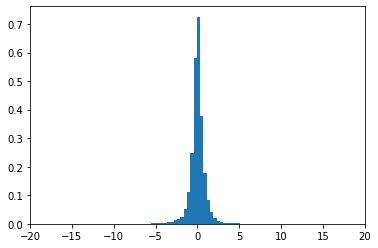

In [84]:
plt.hist(a2, bins = 100, density = True);
plt.xlim(-20,20)

Logo temos que fazer

In [85]:
sigma = gpz["sigma"].values * var

In [86]:
#pdf_gpz = []
pdf_gpz = np.empty((len(gpz),200))
for i in range(len(mu)):
    pdf_normal = norm.pdf(x_plot,loc = mu[i],scale=sigma[i])
    pdf_normal = pdf_normal.reshape(-1,1)
    pdf_gpz[i,:] = pdf_normal[:,0]

In [87]:
mc_gpz = []
z = np.empty(steps)
for i in range(len(gpz)):
    for j in range(steps):
        zfinal, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf_gpz[i,:])/np.cumsum(pdf_gpz[i,:])[-1],x_plot)
        z[j] = zfinal
    mc_gpz.append(np.mean(z))


In [88]:
bins_gpz = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (mu>(j-0.05)) & (mu<j)
    bins_gpz.append(b)

In [89]:
bins_gpz.insert(0,mu<(0.5))

In [90]:
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",mu[bins_gpz[i]].shape[0])

Object in each bins: 
bin0 : 739
bin1 : 1323
bin2 : 1680
bin3 : 1665
bin4 : 1625
bin5 : 1575
bin6 : 1546
bin7 : 1453
bin8 : 1251
bin9 : 723
bin10 : 388
bin11 : 201
bin12 : 69
bin13 : 40
bin14 : 14
bin15 : 4
bin16 : 1
bin17 : 1
bin18 : 0
bin19 : 0
bin20 : 0


In [91]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(gpz_zspec[bins_gpz[i]],mu[bins_gpz[i]],"GPz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [92]:
gpz_bins = pd.concat(results,ignore_index=False,axis = 1)

In [93]:
gpz_bins

,GPz-bins0,GPz-bins1,GPz-bins2,GPz-bins3,GPz-bins4,GPz-bins5,GPz-bins6,GPz-bins7,GPz-bins8,GPz-bins9,GPz-bins10,GPz-bins11
RMSE_znorm,0.073327,0.065816,0.073357,0.076063,0.077213,0.087930,0.080099,0.081074,0.089536,0.100624,0.103928,0.087666
bias_znorm,0.005291,0.007434,0.005170,0.007020,0.008540,0.007371,0.001916,0.000384,0.001497,0.003729,0.005869,0.014451
std_znorm,0.073136,0.065395,0.073174,0.075739,0.076739,0.087620,0.080076,0.081073,0.089523,0.100555,0.103763,0.086467
RMSE,0.135348,0.118718,0.115526,0.115673,0.114801,0.127507,0.128583,0.134167,0.137858,0.159705,0.162105,0.155278
|znorm| > 0.15 (%),4.194858,2.116402,3.928571,3.003003,4.246154,4.571429,4.204398,3.785272,4.156675,4.979253,4.381443,5.472637
|znorm| > 3std (%),2.571042,1.360544,2.321429,1.681682,1.784615,1.650794,1.293661,0.963524,1.039169,1.244813,1.030928,1.492537
scatter,0.073327,0.065816,0.073357,0.076063,0.077213,0.087930,0.080099,0.081074,0.089536,0.100624,0.103928,0.087666
bias,0.005291,0.007434,0.005170,0.007020,0.008540,0.007371,0.001916,0.000384,0.001497,0.003729,0.005869,0.014451
fr015,95.805142,97.883598,96.071429,96.996997,95.753846,95.428571,95.795602,96.214728,95.843325,95.020747,95.618557,94.527363
sigma68,0.043540,0.054927,0.068555,0.070992,0.076972,0.085056,0.099198,0.102002,0.100582,0.111151,0.119579,0.135759


In [94]:
gpz_bins_plot = []
for i in range(12):
    a = mu[bins_gpz[i]]
    gpz_bins_plot.append(np.round(np.mean(a),2))
gpz_bins_plot

[0.47, 0.53, 0.58, 0.62, 0.67, 0.72, 0.77, 0.82, 0.87, 0.92, 0.97, 1.02]

In [95]:
stack_gpz = []
for i in range(len(bins_ann)):
    stack_gpz.append(pdf_gpz[bins_ann[i],:])

### MC-CDF GPz DR1

In [96]:
mc_gpz = np.array(mc_gpz)
print("Object in each bins: ")
for i in range(len(bins_ann)):
    print("bin"+str(i)+" :",mc_gpz[bins_gpz[i]].shape[0])

Object in each bins: 
bin0 : 739
bin1 : 1323
bin2 : 1680
bin3 : 1665
bin4 : 1625
bin5 : 1575
bin6 : 1546
bin7 : 1453
bin8 : 1251
bin9 : 723
bin10 : 388
bin11 : 201
bin12 : 69
bin13 : 40
bin14 : 14
bin15 : 4
bin16 : 1
bin17 : 1
bin18 : 0
bin19 : 0
bin20 : 0


In [97]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(gpz_zspec[bins_gpz[i]],mc_gpz[bins_gpz[i]],"GPz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [98]:
mc_gpz_bins = pd.concat(results,ignore_index=False,axis = 1)
mc_gpz_bins

,GPz-bins0,GPz-bins1,GPz-bins2,GPz-bins3,GPz-bins4,GPz-bins5,GPz-bins6,GPz-bins7,GPz-bins8,GPz-bins9,GPz-bins10,GPz-bins11
RMSE_znorm,0.171569,0.093186,0.091900,0.090644,0.087008,0.098850,0.090488,0.091935,0.095687,0.113606,0.111407,0.114818
bias_znorm,0.020711,0.009171,0.007754,0.010483,0.011928,0.012020,0.009387,0.008393,0.008129,0.016376,0.020967,0.040970
std_znorm,0.170314,0.092733,0.091572,0.090036,0.086187,0.098117,0.090000,0.091551,0.095341,0.112419,0.109416,0.107260
RMSE,0.199319,0.128906,0.133435,0.126892,0.126762,0.143080,0.142479,0.146704,0.146527,0.176897,0.173991,0.202937
|znorm| > 0.15 (%),5.683356,3.023432,5.357143,4.144144,4.923077,6.031746,5.627426,5.092911,4.876099,7.468880,7.474227,11.940299
|znorm| > 3std (%),1.488498,1.965231,2.023810,1.921922,1.969231,1.968254,1.681759,1.445286,1.598721,1.244813,1.030928,2.487562
scatter,0.171569,0.093186,0.091900,0.090644,0.087008,0.098850,0.090488,0.091935,0.095687,0.113606,0.111407,0.114818
bias,0.020711,0.009171,0.007754,0.010483,0.011928,0.012020,0.009387,0.008393,0.008129,0.016376,0.020967,0.040970
fr015,94.316644,96.976568,94.642857,95.855856,95.076923,93.968254,94.372574,94.907089,95.123901,92.531120,92.525773,88.059701
sigma68,0.046599,0.056605,0.073005,0.076412,0.081139,0.090555,0.104412,0.107031,0.104907,0.124066,0.124242,0.158676


## DR2

O mesmo para DR2 data

In [99]:
mu = gpz_dr2["gpz:z"].values
sigma = gpz_dr2["sigma"].values

gpz_zspec = gpz_dr2["z"].values

In [100]:
a = (gpz_zspec - mu)/sigma

In [101]:
var = np.sqrt(np.var(a))

In [102]:
var

15.858106778932923

In [103]:
import matplotlib.mlab as mlab

In [104]:
kde = mlab.GaussianKDE(a)

In [105]:
a2 = a/np.sqrt(np.var(a))

In [106]:
np.var(a2)

1.0000000000000002

(-20.0, 20.0)

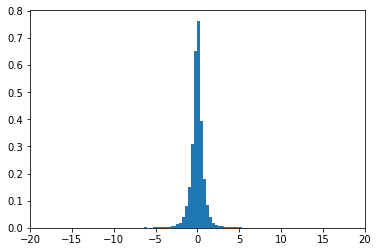

In [107]:
plt.hist(a2, bins = 100, density = True);
plt.xlim(-20,20)

In [108]:
sigma = gpz_dr2["sigma"].values * var

In [109]:
#pdf_gpz = []
pdf_gpz_dr2 = np.empty((len(gpz_dr2),200))
for i in range(len(mu)):
    pdf_normal = norm.pdf(x_plot,loc = mu[i],scale=sigma[i])
    pdf_normal = pdf_normal.reshape(-1,1)
    pdf_gpz_dr2[i,:] = pdf_normal[:,0]

In [110]:
mc_gpz_dr2 = []
z = np.empty(steps)
for i in range(len(gpz_dr2)):
    for j in range(steps):
        zfinal, rand, cdf1,cdf2 = metrics.mc_cdf(np.cumsum(pdf_gpz_dr2[i,:])/np.cumsum(pdf_gpz_dr2[i,:])[-1],x_plot_dr2)
        z[j] = zfinal
    mc_gpz_dr2.append(zfinal)


In [111]:
bins_gpz_dr2 = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (mu>(j-0.05)) & (mu<j)
    bins_gpz_dr2.append(b)

In [112]:
bins_gpz_dr2.insert(0,mu<(0.5))

In [113]:
print("Object in each bins: ")
for i in range(len(bins_ann_dr2)):
    print("bin"+str(i)+" :",mu[bins_gpz_dr2[i]].shape[0])

Object in each bins: 
bin0 : 1006
bin1 : 1482
bin2 : 1696
bin3 : 1652
bin4 : 1643
bin5 : 1445
bin6 : 1369
bin7 : 1373
bin8 : 1300
bin9 : 862
bin10 : 471
bin11 : 264
bin12 : 119
bin13 : 67
bin14 : 26
bin15 : 20
bin16 : 5
bin17 : 4
bin18 : 1
bin19 : 0
bin20 : 0


In [114]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(gpz_zspec[bins_gpz_dr2[i]],mu[bins_gpz_dr2[i]],"GPz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [115]:
gpz_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [116]:
gpz_bins_dr2

,GPz-bins0,GPz-bins1,GPz-bins2,GPz-bins3,GPz-bins4,GPz-bins5,GPz-bins6,GPz-bins7,GPz-bins8,GPz-bins9,GPz-bins10,GPz-bins11
RMSE_znorm,0.066939,0.063552,0.070145,0.064932,0.064453,0.074436,0.075092,0.084066,0.088494,0.067975,0.098497,0.108943
bias_znorm,-0.000942,0.008512,0.008872,0.005156,0.001910,0.006076,0.002955,0.004073,0.003364,-0.003216,0.006922,0.009370
std_znorm,0.066933,0.062979,0.069581,0.064727,0.064425,0.074188,0.075034,0.083968,0.088430,0.067898,0.098254,0.108540
RMSE,0.098965,0.083952,0.095215,0.098467,0.099042,0.105500,0.115232,0.125364,0.130279,0.124329,0.149673,0.162229
|znorm| > 0.15 (%),3.379722,2.294197,3.301887,2.602906,2.921485,3.183391,2.848795,3.058995,3.538462,2.668213,4.458599,4.166667
|znorm| > 3std (%),2.485089,1.889339,2.358491,2.058111,1.704200,1.314879,1.533966,1.165331,1.076923,1.044084,1.273885,1.515152
scatter,0.066939,0.063552,0.070145,0.064932,0.064453,0.074436,0.075092,0.084066,0.088494,0.067975,0.098497,0.108943
bias,-0.000942,0.008512,0.008872,0.005156,0.001910,0.006076,0.002955,0.004073,0.003364,-0.003216,0.006922,0.009370
fr015,96.620278,97.705803,96.698113,97.397094,97.078515,96.816609,97.151205,96.941005,96.461538,97.331787,95.541401,95.833333
sigma68,0.049990,0.053192,0.060005,0.053473,0.058745,0.066885,0.068586,0.079418,0.087134,0.090651,0.097949,0.103030


In [117]:
gpz_bins_plot_dr2 = []
for i in range(12):
    a = mu[bins_gpz_dr2[i]]
    gpz_bins_plot_dr2.append(np.round(np.mean(a),2))
gpz_bins_plot_dr2

[0.47, 0.53, 0.58, 0.63, 0.67, 0.72, 0.77, 0.83, 0.87, 0.92, 0.97, 1.02]

In [118]:
stack_gpz_dr2 = []
for i in range(len(bins_ann_dr2)):
    stack_gpz.append(pdf_gpz_dr2[bins_ann_dr2[i],:])

In [119]:
mc_gpz_dr2 = np.array(mc_gpz_dr2)
print("Object in each bins: ")
for i in range(len(bins_ann_dr2)):
    print("bin"+str(i)+" :",mc_gpz_dr2[bins_gpz_dr2[i]].shape[0])

Object in each bins: 
bin0 : 1006
bin1 : 1482
bin2 : 1696
bin3 : 1652
bin4 : 1643
bin5 : 1445
bin6 : 1369
bin7 : 1373
bin8 : 1300
bin9 : 862
bin10 : 471
bin11 : 264
bin12 : 119
bin13 : 67
bin14 : 26
bin15 : 20
bin16 : 5
bin17 : 4
bin18 : 1
bin19 : 0
bin20 : 0


In [120]:
results = []
for i in range((12)):
    aux = metrics.compute_metrics(gpz_zspec[bins_gpz_dr2[i]],mc_gpz_dr2[bins_gpz_dr2[i]],"GPz-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [121]:
mc_gpz_bins_dr2 = pd.concat(results,ignore_index=False,axis = 1)

In [122]:
mc_gpz_bins_dr2

,GPz-bins0,GPz-bins1,GPz-bins2,GPz-bins3,GPz-bins4,GPz-bins5,GPz-bins6,GPz-bins7,GPz-bins8,GPz-bins9,GPz-bins10,GPz-bins11
RMSE_znorm,0.158464,0.119773,0.120629,0.104962,0.110692,0.118806,0.133845,0.141923,0.136813,0.137049,0.174203,0.188473
bias_znorm,0.003756,-0.005057,-0.012154,-0.029371,-0.035559,-0.033338,-0.047733,-0.049071,-0.055750,-0.065682,-0.049812,-0.059149
std_znorm,0.158419,0.119666,0.120015,0.100769,0.104825,0.114032,0.125045,0.133170,0.124939,0.120284,0.166930,0.178951
RMSE,0.208311,0.175633,0.177840,0.168316,0.181784,0.190761,0.226674,0.234733,0.243556,0.270983,0.330008,0.363422
|znorm| > 0.15 (%),12.823062,11.133603,10.908019,9.503632,9.981741,10.103806,13.805698,14.275310,17.769231,22.041763,29.087049,35.984848
|znorm| > 3std (%),1.789264,2.159244,1.827830,1.997579,1.399878,1.660900,1.314828,1.602331,1.692308,1.856148,1.910828,1.136364
scatter,0.158464,0.119773,0.120629,0.104962,0.110692,0.118806,0.133845,0.141923,0.136813,0.137049,0.174203,0.188473
bias,0.003756,-0.005057,-0.012154,-0.029371,-0.035559,-0.033338,-0.047733,-0.049071,-0.055750,-0.065682,-0.049812,-0.059149
fr015,87.176938,88.866397,89.091981,90.496368,90.018259,89.896194,86.194302,85.724690,82.230769,77.958237,70.912951,64.015152
sigma68,0.098995,0.098156,0.105936,0.093967,0.102263,0.109976,0.121430,0.133041,0.151274,0.179695,0.231745,0.294573


# Plots

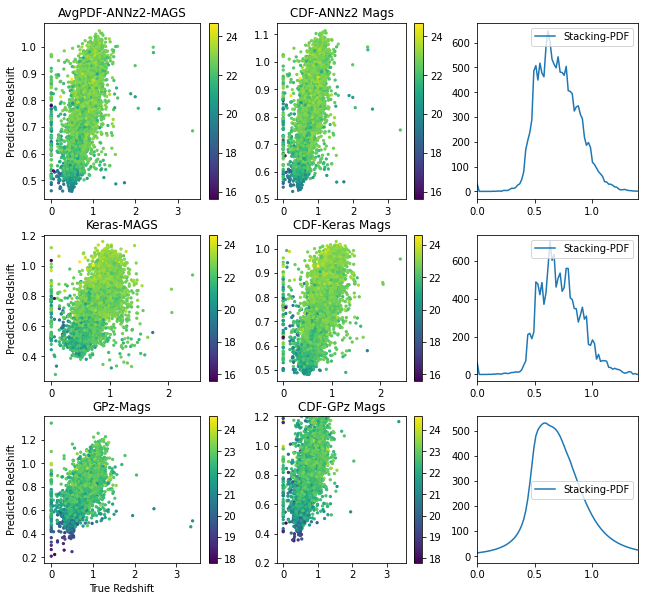

In [123]:
## annz###

fig = plt.figure()
grid = plt.GridSpec(18,18, top = 2,right = 1.5)
ax = plt.subplot(grid[0:6,:6])
plt.scatter(annz["D:z"],annz['F:ANNZ_PDF_avg_0'], c = annz_mags["F:MAG_AUTO_R"],s = 5)
plt.title("AvgPDF-ANNz2-MAGS")
plt.colorbar()
plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[0:6,7:12])
plt.scatter(annz["D:z"],mc_annz,c =  annz_mags["F:MAG_AUTO_R"],s = 5)
plt.title("CDF-ANNz2 Mags")
plt.colorbar()

ax = plt.subplot(grid[0:6,13:])
plt.plot(x_plot,pdf_final_annz, label = "Stacking-PDF")
plt.xlim(0,1.4)
plt.legend()

### ANN
ax = plt.subplot(grid[7:12,:6])
plt.scatter(ann["z"],ann['ann:z'], c = ann["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title("Keras-MAGS")

plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[7:12,7:12])
plt.scatter(ann["z"],mc_ann,c =  ann["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title("CDF-Keras Mags")

ax = plt.subplot(grid[7:12,13:])
plt.plot(x_plot,pdf_final_ann, label = "Stacking-PDF")
plt.xlim(0,1.4)

plt.legend()

# GPz
ax = plt.subplot(grid[13:,:6])
plt.scatter(gpz["z"],gpz['gpz:z'], c = gpz["MAG_AUTO_R_DERED"],s = 5)
plt.colorbar()
plt.title('GPz-Mags')
plt.ylabel("Predicted Redshift")
plt.xlabel("True Redshift")

ax = plt.subplot(grid[13:,7:12])
plt.scatter(gpz["z"],mc_gpz,c =  gpz["MAG_AUTO_R_DERED"],s = 5)
plt.ylim(0.19999,1.2)
plt.colorbar()
plt.title("CDF-GPz Mags")


ax = plt.subplot(grid[13:,13:])
plt.plot(x_plot,np.sum(pdf_gpz[:,:]/50,axis=0), label = "Stacking-PDF")
plt.xlim(0,1.4)

plt.legend()


plt.savefig("final-plots/box_all_dr1.png",bbox_inches='tight')

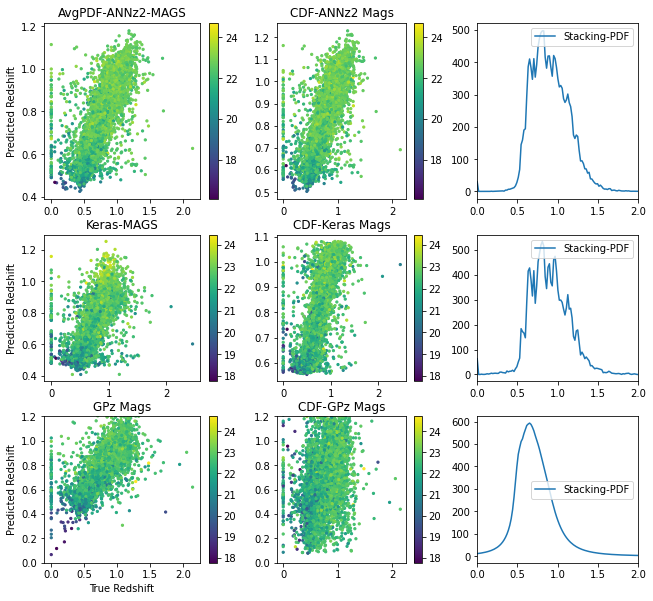

In [124]:
## annz###

fig = plt.figure()
grid = plt.GridSpec(18,18, top = 2,right = 1.5)
ax = plt.subplot(grid[0:6,:6])
plt.scatter(annz_dr2["D:z"],annz_dr2['F:ANNZ_PDF_avg_0'], c = annz_mags_dr2["F:MAG_R"],s = 5)
plt.title("AvgPDF-ANNz2-MAGS")
#plt.ylim(0,1.2)

plt.colorbar()
plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[0:6,7:12])
plt.scatter(annz_dr2["D:z"],mc_annz_dr2,c =  annz_mags_dr2["F:MAG_R"],s = 5)
#plt.ylim(0,1.2)

plt.title("CDF-ANNz2 Mags")
plt.colorbar()

ax = plt.subplot(grid[0:6,13:])
plt.plot(x_plot,pdf_final_annz_dr2, label = "Stacking-PDF")
plt.xlim(0,2)
plt.legend()

### ANN
ax = plt.subplot(grid[7:12,:6])
plt.scatter(ann_dr2["z"],ann_dr2['ann:z'], c = ann_dr2["MAG_AUTO_R_DERED"],s = 5)
#plt.ylim(0,1.2)

plt.colorbar()
plt.title("Keras-MAGS")

plt.ylabel("Predicted Redshift")


ax = plt.subplot(grid[7:12,7:12])
plt.scatter(ann_dr2["z"],mc_ann_dr2,c =  ann_dr2["MAG_AUTO_R_DERED"],s = 5)
#plt.ylim(0,1.2)

plt.colorbar()
plt.title("CDF-Keras Mags")

ax = plt.subplot(grid[7:12,13:])
plt.plot(x_plot,pdf_final_ann_dr2, label = "Stacking-PDF")
plt.xlim(0,2)

plt.legend()

# GPz
ax = plt.subplot(grid[13:,:6])
plt.scatter(gpz_dr2["z"],gpz_dr2['gpz:z'], c = gpz_dr2["MAG_AUTO_R_DERED"],s = 5)
plt.ylim(0,1.2)

plt.colorbar()
plt.title('GPz Mags')
plt.ylabel("Predicted Redshift")
plt.xlabel("True Redshift")

ax = plt.subplot(grid[13:,7:12])
plt.scatter(gpz_dr2["z"],mc_gpz_dr2,c =  gpz_dr2["MAG_AUTO_R_DERED"],s = 5)
plt.ylim(0,1.2)
plt.colorbar()
plt.title("CDF-GPz Mags")


ax = plt.subplot(grid[13:,13:])
plt.plot(x_plot,np.sum(pdf_gpz_dr2[:,:]/50,axis=0), label = "Stacking-PDF")
plt.xlim(0,2.)

plt.legend()


plt.savefig("final-plots/box_all_dr2.png",bbox_inches='tight')

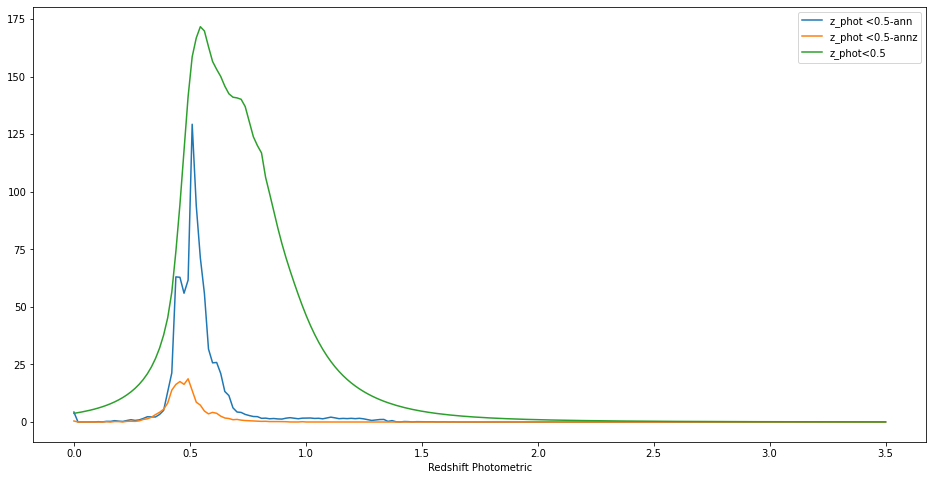

In [125]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(x_plot,np.sum(stack_ann[0],axis = 0),label = "z_phot <0.5-ann")
plt.plot(x_plot,np.sum(stack_annz[0],axis = 0),label = "z_phot <0.5-annz")
plt.plot(x_plot,np.sum(stack_gpz[0],axis = 0)/10,label = "z_phot<0.5")
#for i in range(3):
    #j = j + 0.05
    #st1 = round(j-0.05,3)
    #st2 = round(j,3)
    #plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("teste1.png",dpi = 300)

In [126]:
ann_spec = []
for i in range(12):
    a = ann.z.values[bins_ann[i]]
    ann_spec.append(np.round(np.mean(a),2))
ann_spec

annz_spec = []
for i in range(13):
    a = annz['F:ANNZ_PDF_avg_0'].values[bins_annz[i]]
    annz_spec.append(np.round(np.mean(a),2))
annz_spec

gpz_spec = []
for i in range(12):
    a = gpz['z'].values[bins_gpz[i]]
    gpz_spec.append(np.round(np.mean(a),2))


In [127]:
## gpz
a = gpz_bins.iloc[7].values
b = gpz_bins.iloc[6].values
c = gpz_bins.iloc[8].values
d = gpz_bins.iloc[9].values


## ann
e = ann_bins.iloc[6].values
f = ann_bins.iloc[7].values
g = ann_bins.iloc[8].values
h = ann_bins.iloc[9].values


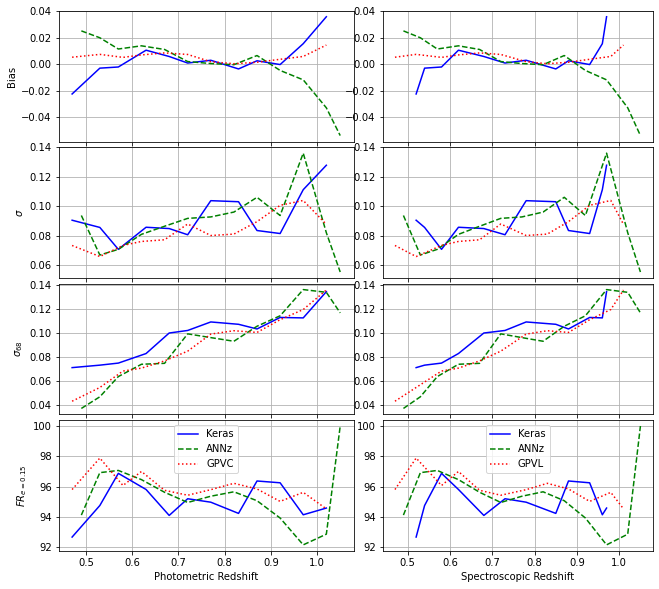

In [128]:
gpz_bins.iloc[7]
fig = plt.figure()
grid = plt.GridSpec(16,24, top = 2,right = 1.5)
ax = plt.subplot(grid[0:4,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[7],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[7],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.ylabel("Bias")

ax = plt.subplot(grid[0:4,13:])
plt.plot(ann_spec,f[:13],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,a[:13],label = "GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[4:8,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[6],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[6],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma$")
plt.grid()

ax = plt.subplot(grid[4:8,13:])
plt.plot(ann_spec,e[:13],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,b[:13],label = "GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[8:12,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[9],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[9],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma_{68}$")
plt.grid()

ax = plt.subplot(grid[8:12,13:])
plt.plot(ann_spec,h[:13],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,d[:13],label = "GPVL", c= "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[12:16,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[8],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[8],label = "GPVC", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.xlabel("Photometric Redshift")
plt.grid()
plt.legend()

ax = plt.subplot(grid[12:16,13:])
plt.plot(ann_spec,g[:13],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,c[:13],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.legend()

plt.xlabel("Spectroscopic Redshift")



plt.savefig("final-plots/metrics_dr1.png",bbox_inches='tight')

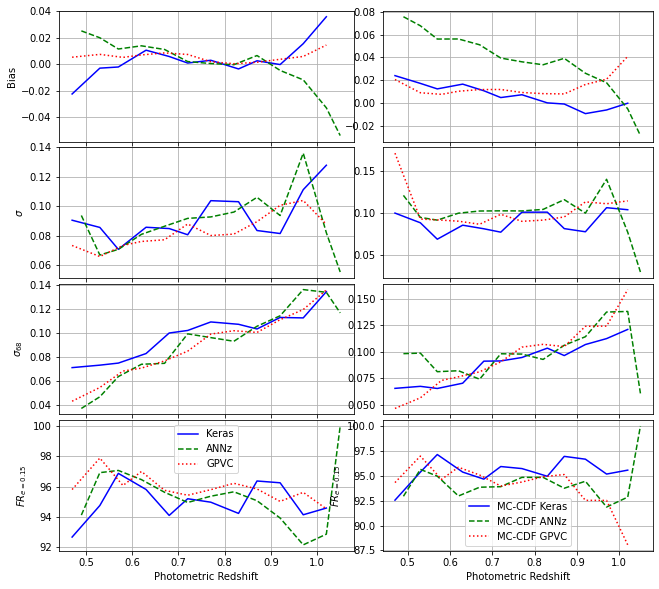

In [129]:
fig = plt.figure()
grid = plt.GridSpec(16,24, top = 2,right = 1.5)
ax = plt.subplot(grid[0:4,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[7],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[7],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.ylabel("Bias")

ax = plt.subplot(grid[0:4,13:])
plt.plot(ann_bins_plot,mc_ann_bins.iloc[7],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,mc_annz_bins.iloc[7],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,mc_gpz_bins.iloc[7],label = "MC-CDF GPVL", c = "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[4:8,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[6],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[6],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma$")
plt.grid()

ax = plt.subplot(grid[4:8,13:])
plt.plot(ann_bins_plot,mc_ann_bins.iloc[6],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,mc_annz_bins.iloc[6],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,mc_gpz_bins.iloc[6],label = "MC-CDF GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[8:12,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[9],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[9],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma_{68}$")
plt.grid()

ax = plt.subplot(grid[8:12,13:])
plt.plot(ann_bins_plot,mc_ann_bins.iloc[9],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,mc_annz_bins.iloc[9],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,mc_gpz_bins.iloc[9],label = "MC-CDF GPVL", c= "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[12:16,:12])
plt.plot(ann_bins_plot,ann_bins.iloc[8],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,annz_bins.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,gpz_bins.iloc[8],label = "GPVC", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.xlabel("Photometric Redshift")
plt.grid()
plt.legend()

ax = plt.subplot(grid[12:16,13:])
plt.plot(ann_bins_plot,mc_ann_bins.iloc[8],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot,mc_annz_bins.iloc[8],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot,mc_gpz_bins.iloc[8],label = "MC-CDF GPVC", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.grid()
plt.legend()

plt.xlabel("Photometric Redshift")



plt.savefig("final-plots/metrics_cdf_dr1.png",bbox_inches='tight')

In [130]:
ann_spec = []
for i in range(11):
    a = ann_dr2.z.values[bins_ann_dr2[i]]
    ann_spec.append(np.round(np.mean(a),2))
ann_spec

annz_spec = []
for i in range(15):
    a = annz_dr2['F:ANNZ_PDF_avg_0'].values[bins_annz_dr2[i]]
    annz_spec.append(np.round(np.mean(a),2))
annz_spec

gpz_spec = []
for i in range(12):
    a = gpz_dr2['z'].values[bins_gpz_dr2[i]]
    gpz_spec.append(np.round(np.mean(a),2))


In [131]:
## gpz
a = gpz_bins_dr2.iloc[7].values
b = gpz_bins_dr2.iloc[6].values
c = gpz_bins_dr2.iloc[8].values
d = gpz_bins_dr2.iloc[9].values


## ann
e = ann_bins_dr2.iloc[6].values
f = ann_bins_dr2.iloc[7].values
g = ann_bins_dr2.iloc[8].values
h = ann_bins_dr2.iloc[9].values


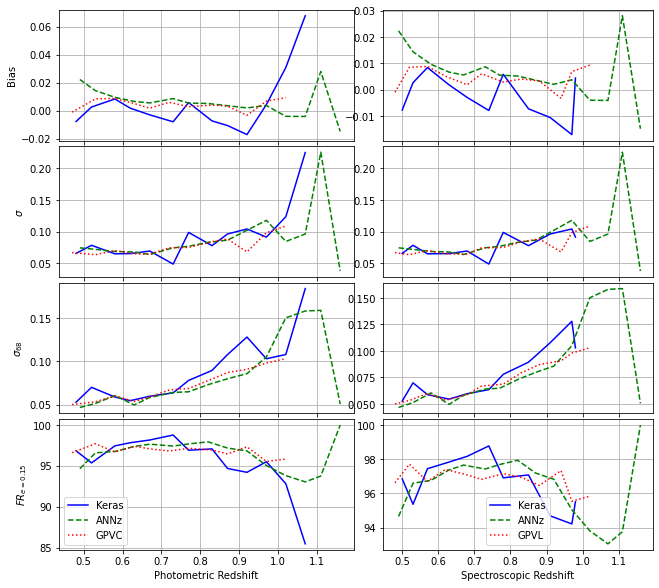

In [132]:
gpz_bins.iloc[7]
fig = plt.figure()
grid = plt.GridSpec(16,24, top = 2,right = 1.5)
ax = plt.subplot(grid[0:4,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[7],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[7],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.ylabel("Bias")

ax = plt.subplot(grid[0:4,13:])
plt.plot(ann_spec,f[:11],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins_dr2.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,a[:16],label = "GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[4:8,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[6],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[6],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma$")
plt.grid()

ax = plt.subplot(grid[4:8,13:])
plt.plot(ann_spec,e[:11],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins_dr2.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,b[:16],label = "GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[8:12,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[9],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[9],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma_{68}$")
plt.grid()

ax = plt.subplot(grid[8:12,13:])
plt.plot(ann_spec,h[:11],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins_dr2.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,d[:16],label = "GPVL", c= "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[12:16,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[8],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[8],label = "GPVC", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.xlabel("Photometric Redshift")
plt.grid()
plt.legend()

ax = plt.subplot(grid[12:16,13:])
plt.plot(ann_spec,g[:11],label = "Keras", c= "b", ls = "-")
plt.plot(annz_spec,annz_bins_dr2.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_spec,c[:16],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.xlabel("Spectroscopic Redshift")
plt.legend()



plt.savefig("final-plots/metrics_dr2.png",bbox_inches='tight')

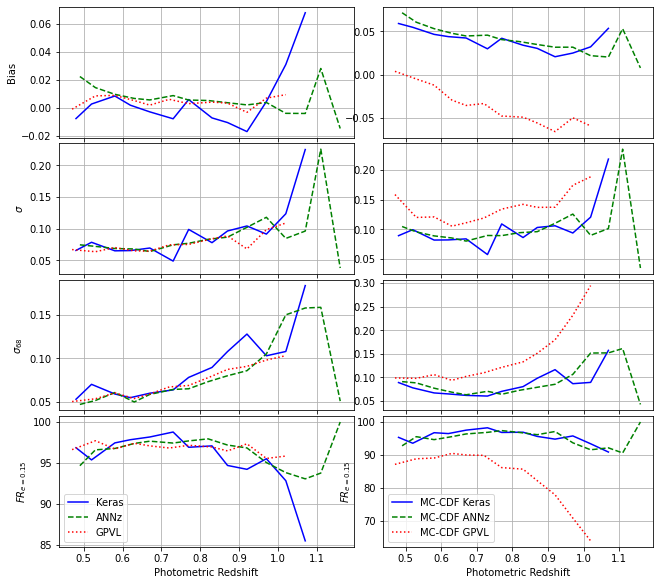

In [133]:
fig = plt.figure()
grid = plt.GridSpec(16,24, top = 2,right = 1.5)
ax = plt.subplot(grid[0:4,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[7],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[7],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[7],label = "GPVL", c= "r", ls = ":")
plt.grid()
plt.ylabel("Bias")

ax = plt.subplot(grid[0:4,13:])
plt.plot(ann_bins_plot_dr2,mc_ann_bins_dr2.iloc[7],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,mc_annz_bins_dr2.iloc[7],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,mc_gpz_bins_dr2.iloc[7],label = "MC-CDF GPVL", c = "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[4:8,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[6],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[6],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[6],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma$")
plt.grid()

ax = plt.subplot(grid[4:8,13:])
plt.plot(ann_bins_plot_dr2,mc_ann_bins_dr2.iloc[6],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,mc_annz_bins_dr2.iloc[6],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,mc_gpz_bins_dr2.iloc[6],label = "MC-CDF GPVL", c= "r", ls = ":")
plt.grid()

ax = plt.subplot(grid[8:12,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[9],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[9],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[9],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$\sigma_{68}$")
plt.grid()

ax = plt.subplot(grid[8:12,13:])
plt.plot(ann_bins_plot_dr2,mc_ann_bins_dr2.iloc[9],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,mc_annz_bins_dr2.iloc[9],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,mc_gpz_bins_dr2.iloc[9],label = "MC-CDF GPVL", c= "r", ls = ":")
plt.grid()


ax = plt.subplot(grid[12:16,:12])
plt.plot(ann_bins_plot_dr2,ann_bins_dr2.iloc[8],label = "Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,annz_bins_dr2.iloc[8],label = "ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,gpz_bins_dr2.iloc[8],label = "GPVL", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.xlabel("Photometric Redshift")
plt.grid()
plt.legend()

ax = plt.subplot(grid[12:16,13:])
plt.plot(ann_bins_plot_dr2,mc_ann_bins_dr2.iloc[8],label = "MC-CDF Keras", c= "b", ls = "-")
plt.plot(annz_bins_plot_dr2,mc_annz_bins_dr2.iloc[8],label = "MC-CDF ANNz", c= "g", ls = "--")
plt.plot(gpz_bins_plot_dr2,mc_gpz_bins_dr2.iloc[8],label = "MC-CDF GPVL", c= "r", ls = ":")
plt.ylabel("$FR_{e =0.15}$")
plt.grid()
plt.legend()

plt.xlabel("Photometric Redshift")



plt.savefig("final-plots/metrics_cdf_dr2.png",bbox_inches='tight')

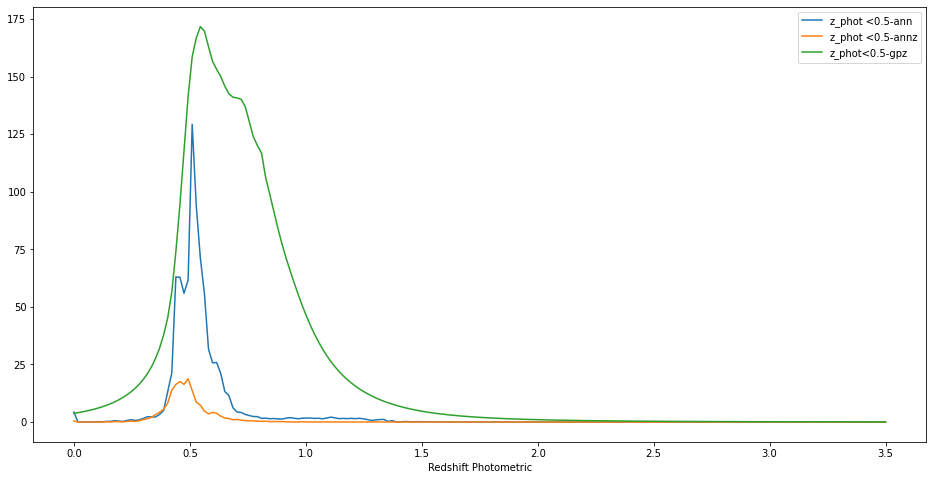

In [134]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(x_plot,np.sum(stack_ann[0],axis = 0),label = "z_phot <0.5-ann")
plt.plot(x_plot,np.sum(stack_annz[0],axis = 0),label = "z_phot <0.5-annz")
plt.plot(x_plot,np.sum(stack_gpz[0],axis = 0)/10,label = "z_phot<0.5-gpz")
#for i in range(3):
    #j = j + 0.05
    #st1 = round(j-0.05,3)
    #st2 = round(j,3)
    #plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("teste1.png",dpi = 300)

Text(0.5, 0, 'Redshift Photometric')

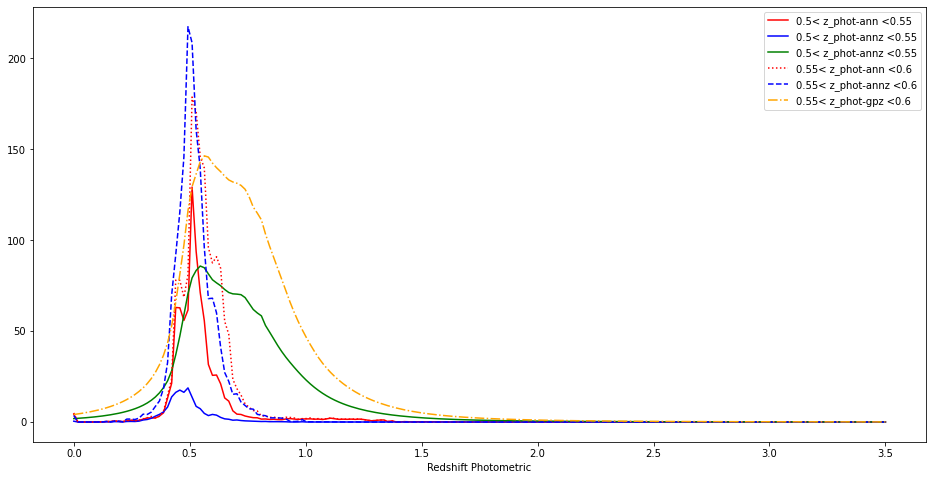

In [135]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
for i in range(2):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    if i == 0:
        plt.plot(x_plot,np.sum(stack_ann[i],axis = 0),label = str(st1)+"< z_phot-ann <"+str(st2), c = "r")
        plt.plot(x_plot,np.sum(stack_annz[i],axis = 0),label = str(st1)+"< z_phot-annz <"+str(st2), c = 'b')
        plt.plot(x_plot,np.sum(stack_gpz[i],axis = 0)/20,label = str(st1)+"< z_phot-annz <"+str(st2), c = 'green')

    else:
        plt.plot(x_plot,np.sum(stack_ann[i],axis = 0),label = str(st1)+"< z_phot-ann <"+str(st2), c = "r", ls = ":")
        plt.plot(x_plot,np.sum(stack_annz[i],axis = 0),label = str(st1)+"< z_phot-annz <"+str(st2), c = 'b',ls = "--")
        plt.plot(x_plot,np.sum(stack_gpz[i],axis = 0)/20,label = str(st1)+"< z_phot-gpz <"+str(st2), c = 'orange', ls = "-.")

plt.legend()
plt.xlabel("Redshift Photometric")
#plt.savefig("teste2.png",dpi = 300)